## Datos secuenciales
**Selección y generación de variables**

*J. Ramón Sánchez Leo - Febrero 2022*

Tratar con datos secuenciales tiene ventajas si sabemos aprovechar, de manera adecuada, la estructura temporal de la información.

Lo podemos hacer utilizando diferentes técnicas de generación de varaibles, dependerá del problema al que tengamos que enfrentarnos. Entra las más destacadas están:

* Utilizar retardos de las variables, incluida la objetivo, como predictores.
* Usar promedios de las variables en una cierta ventana temporal, así como sus variaciones.
* Ajsutar modelos agregados para reducir el ruido.

En este notebook nos vamos a enfrentar al problema de predecir si un valor de renta variable va a subir más de un 2,5% dentro de una semana.

Para ello se descargan los datos de evolución del precio diario utilizado la librería yfinance para descargar datos de yahoo finance. 
A partir del OHLC (*Open-High-Close-Low*) y el volumen diario de cada valor generaremos variables para tratar de realizar las mejores predicciones posibles.

> ### <font color='#720e9e'>**Obtener datos de *Yahoo Finance***</font>

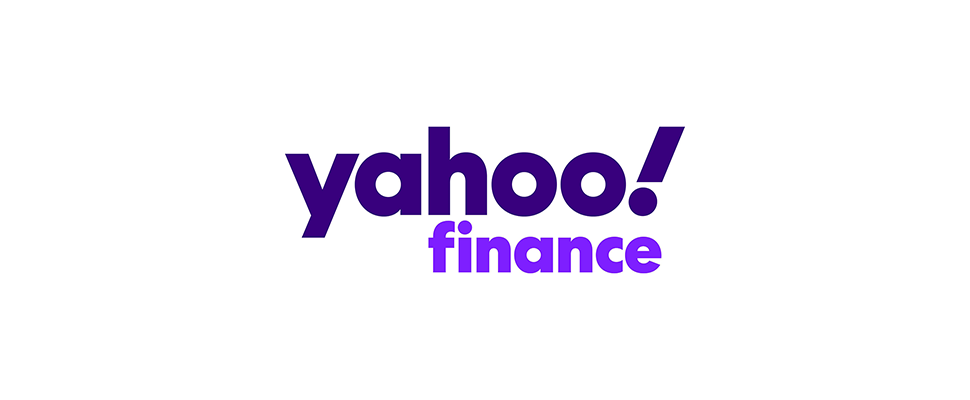

Para obtener datos financieros desde Python existen infinidad de posibilidades, tanto freemium como premium. Obviamente las posibildiades que nos ofrecen las opciones premium son más amplias. Pero la mayoría de las opciones freemium son válidas para muchos de los análisis financieros que se realizan.

Aquí se utiliza uno de los métodos más frecuentes empleados por la comunidad. Los datos que vamos a obtener son los que se reflejan en la web de *Yahoo Finance* y lo vamos a hacer utilizando la API contenida en el módulo [yfinance](https://pypi.org/project/yfinance/).

Con [yfinance](https://pypi.org/project/yfinance/) podemos obtener desde datos históricos hasta datos descriptivos de los activos financieros.

In [3]:
# Instalamos yfinance en nuestro entorno
# !pip install yfinance

In [4]:
# Load yfinacne
import yfinance as yf

In [5]:
# Obtenemos los datos
stock = 'AAPL'
df = yf.download(stock, start = "2001-12-01", end = "2021-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994522,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679626,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873093,121047300


Los principales datos de valores de renta variables son los que tenemos en el dataset que acabamos de descargar:

* Date: fecha.
* Open: precio de apertura en la sesión.
* High: precio máximo en la sesión.
* Low: precio mínimo en la sesión.
* Close: precio de cierre en la sesión.
* Adj Close: precio de cierre ajustado en la sesión.
* Volumen: volumen negociado durante la sesión.

In [6]:
# Load needed libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

> Construcción de nuestra **variable objetivo**

Se pretende construir un buen modelo para predecir si un valor de renta variable subirá dentro de una semana más de un 2,5%.

In [7]:
df['Close+5d'] = df['Close'].shift(-5)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,Close+5d
Date,,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000,0.402500
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600,0.402500
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200,0.388929
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200,0.383750
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400,0.375000
...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994522,54930100,NaN
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679626,124486200,NaN
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873093,121047300,NaN


In [9]:
df['target'] = (df['Close+5d']/df['Close'] > 1.02).astype('int64')
df

,Open,High,Low,Close,Adj Close,Volume,Close+5d,target
Date,,,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000,0.402500,1
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600,0.402500,1
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200,0.388929,0
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200,0.383750,0
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400,0.375000,0
...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994522,54930100,NaN,0
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679626,124486200,NaN,0
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873093,121047300,NaN,0


In [10]:
df['target'].iloc[-5:] = np.nan
df = df.drop(columns = ['Close+5d'])

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
df['target'].value_counts()

0.0    3007
1.0    1793
Name: target, dtype: int64

> **Utilizar retardos de las variables, incluida la objetivo, como predictores.**

Para predecir el comportamiento en los próximos días es útil añadir información a cada observación sobre la evolución en los días anteriores.

>> Generamos la variable de los valores del precio de cierre en la sesión anterior y hace una semana:




In [12]:
df['Close_1d'] = df['Close'].shift(1)
df['Close_5d'] = df['Close'].shift(5)

In [13]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,target,Close_1d,Close_5d
Date,,,,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000,1.0,NaN,NaN
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600,1.0,0.380357,NaN
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200,0.0,0.375893,NaN
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200,0.0,0.400000,NaN
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400,0.0,0.424286,NaN
2001-12-07,0.401071,0.405536,0.392857,0.402500,0.344650,203515200,0.0,0.406786,0.380357
2001-12-10,0.398036,0.410536,0.396964,0.402500,0.344650,170010400,0.0,0.402500,0.375893
2001-12-11,0.404821,0.408036,0.386607,0.388929,0.333030,205475200,0.0,0.402500,0.400000
2001-12-12,0.390536,0.391429,0.379464,0.383750,0.328595,192460800,0.0,0.388929,0.424286


>> También se puede generar la media móvil del precio en las 10, 20 y 50 sesiones anteriores:

In [14]:
df['Close_ma20'] = df['Close'].rolling(20, min_periods=1).mean()
df['Close_ma50'] = df['Close'].rolling(50, min_periods=1).mean()
df['Close_ma200'] = df['Close'].rolling(200, min_periods=1).mean()

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume,target,Close_1d,Close_5d,Close_ma20,Close_ma50,Close_ma200
Date,,,,,,,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000,1.0,NaN,NaN,0.380357,0.380357,0.380357
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600,1.0,0.380357,NaN,0.378125,0.378125,0.378125
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200,0.0,0.375893,NaN,0.385417,0.385417,0.385417
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200,0.0,0.400000,NaN,0.395134,0.395134,0.395134
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400,0.0,0.424286,NaN,0.397464,0.397464,0.397464
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994522,54930100,NaN,130.960007,128.699997,124.903000,119.737000,99.158737
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679626,124486200,NaN,131.970001,126.660004,125.908001,120.056600,99.494725
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873093,121047300,NaN,136.690002,128.229996,126.699000,120.373600,99.866312


In [16]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index, y = df['Close'], mode = 'lines', name = 'Close'))
fig.add_trace(go.Scatter(x = df.index, y = df['Close_ma20'], mode = 'lines', name = 'MA_20'))
fig.add_trace(go.Scatter(x = df.index, y = df['Close_ma50'], mode = 'lines', name = 'MA_50'))
fig.add_trace(go.Scatter(x = df.index, y = df['Close_ma200'], mode = 'lines', name = 'MA_200'))
fig.update_layout(title = f'Close evolution of {stock}', xaxis_title = 'Date', yaxis_title = 'Close')
fig.show()

>> Siempre que sea posible se debe utilizar el conocimiento de negocio para generar variables.

En este caso, es muy típico construir variables, conocidas como indicadores técnicos, que puedan ayudar a predecir el movimiento de la acción en las siguientes sesiones.

El [**índice de fuerza relativa (RSI)**](https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi) es uno de estos indicadores más populares. En este caso es un indicador de momentum de tipo oscilador que, en teoría, mide la velocidad y el cambio de los movimientos del precio. Oscila entre 0 y 100.

Según su autor, J. Welles Wilder (1978), el RSI se considera sobrecomprado cuando está por encima de 70, momento de vender, y sobrevendido cuando está por debajo de 30.

Además, se pueden generar señales buscando divergencias, oscilaciones de fallos y cruces de líneas centrales. El RSI también puede utilizarse para identificar la tendencia general.



In [17]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
    """
    # Get difference between date and last date
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes.
    # With clip we can put 0 when it's negative or positive
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
        # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

<AxesSubplot:xlabel='Date'>

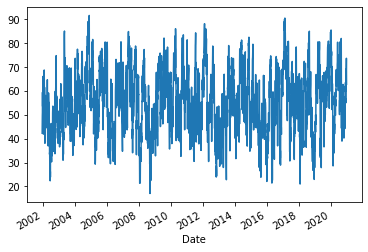

In [18]:
rsi(df).plot()

In [19]:
df['rsi'] = rsi(df)

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,target,Close_1d,Close_5d,Close_ma20,Close_ma50,Close_ma200,rsi
Date,,,,,,,,,,,,,
2001-11-30,0.365536,0.382857,0.361607,0.380357,0.325690,303912000,1.0,NaN,NaN,0.380357,0.380357,0.380357,NaN
2001-12-03,0.376071,0.380000,0.367857,0.375893,0.321867,181165600,1.0,0.380357,NaN,0.378125,0.378125,0.378125,NaN
2001-12-04,0.375893,0.402857,0.370000,0.400000,0.342510,380419200,0.0,0.375893,NaN,0.385417,0.385417,0.385417,NaN
2001-12-05,0.399286,0.429107,0.395893,0.424286,0.363305,568579200,0.0,0.400000,NaN,0.395134,0.395134,0.395134,NaN
2001-12-06,0.419286,0.419643,0.395357,0.406786,0.348320,338934400,0.0,0.424286,NaN,0.397464,0.397464,0.397464,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.994522,54930100,NaN,130.960007,128.699997,124.903000,119.737000,99.158737,67.866386
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.679626,124486200,NaN,131.970001,126.660004,125.908001,120.056600,99.494725,73.597952
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.873093,121047300,NaN,136.690002,128.229996,126.699000,120.373600,99.866312,68.522632
